In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.datasets import make_blobs

In [5]:

from sklearn.metrics import silhouette_score


In [6]:
import matplotlib.pyplot as plt


In [7]:
# Data loading
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

In [8]:
# Data preprocessing (already numeric, so skipped)
# K-Means++ initialization function
def kmeans_plus_plus_init(X, k):
    centroids = []
    centroids.append(X[np.random.randint(0, X.shape[0])])
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
        probs = distances / distances.sum()
        cumulative_probs = np.cumsum(probs)
        r = np.random.rand()
        for idx, prob in enumerate(cumulative_probs):
            if r < prob:
                centroids.append(X[idx])
                break
    return np.array(centroids)

In [9]:
# K-Means implementation
class KMeansScratch:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = kmeans_plus_plus_init(X, self.k)
        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            new_centroids = self._compute_centroids(X)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        self.inertia_ = self._compute_inertia(X)
        return self

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

    def _compute_inertia(self, X):
        return np.sum((X - self.centroids[self.labels]) ** 2)


In [11]:
# Model training
model = KMeansScratch(k=3)
model.fit(X)

In [14]:
#  Evaluation
silhouette_score(X, model.labels)
print(f"Inertia: {model.inertia_}")
print(f"Silhouette Score: {silhouette_score}")

Inertia: 566.859551124413
Silhouette Score: <function silhouette_score at 0x0000021365E83100>


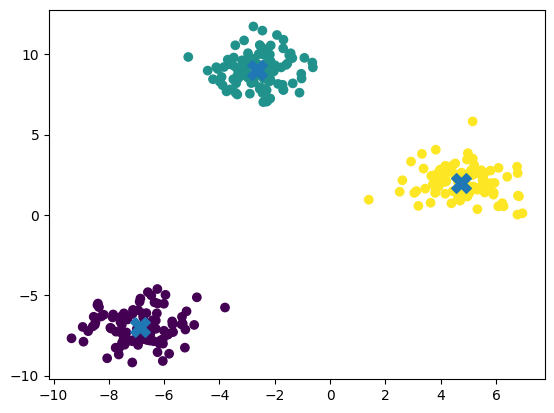

In [16]:
# Plot clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=model.labels)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], marker='X', s=200)
plt.savefig('cluster_plot.png')
plt.show()

In [17]:
# 6. Save results
np.savez('model_centroids.npz', centroids=model.centroids)